<a href="https://colab.research.google.com/github/NamrathaVempadapu2511/Machine_Learning/blob/main/digits_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

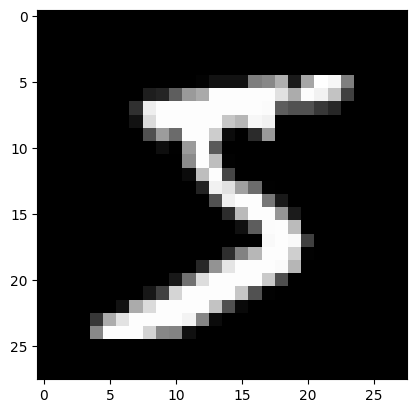

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2602 - accuracy: 0.9249
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1136 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0796 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0605 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0458 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0368 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0289 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0244 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0190 - accuracy: 0.9944
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0833

In [28]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from PIL import Image, ImageOps
import numpy as np
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0
# Display the first image in the training dataset
plt.imshow(x_train[0], cmap='gray')
plt.show()
# Build the model
model = Sequential([
Flatten(input_shape=(28, 28)),
                     Dense(128, activation='relu'),
Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=10) # Increase the numberof epochs
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Function to preprocess the image

In [30]:
def preprocess_image(image_path):
  img = Image.open(image_path).convert('L')
  img = ImageOps.invert(img)
  img = img.resize((28, 28))
  img = np.array(img) / 255.0
  img = img.reshape(1, 28, 28)
  return img
# Path to the handwritten digit image
image_path = 'two.png'
new_image = preprocess_image(image_path)
# Predict the digit
prediction = model.predict(new_image)
predicted_digit = np.argmax(prediction)
print(f"Predicted Digit: {predicted_digit}")

1/1 [==============================] - 0s 78ms/step
Predicted Digit: 2


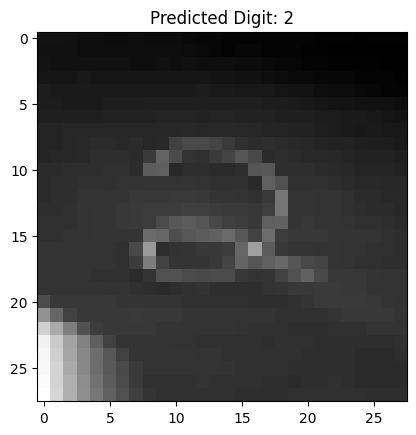

In [31]:
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()